### Import Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

### Load the dataset

In [2]:
# Load California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedianHouseValue')

X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


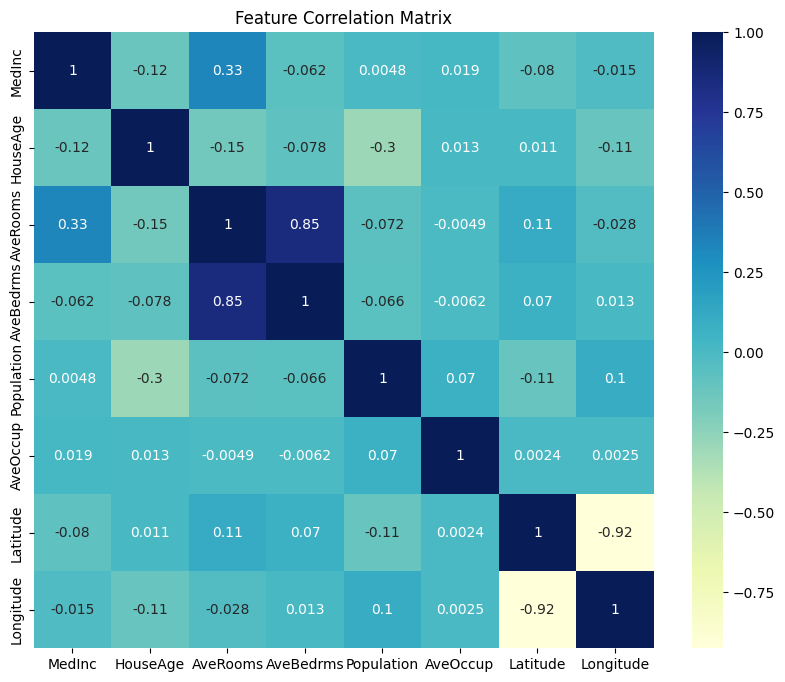

In [5]:
#Correlation Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Matrix")
plt.show()



### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


### Train the Model

In [9]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Evaluate The Model

In [10]:
from sklearn.metrics import r2_score

# Predict on train and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R² score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R² score: {r2_train:.4f}")
print(f"Test R² score: {r2_test:.4f}")


Train R² score: 0.9736
Test R² score: 0.8051


In [11]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error (MAE): 0.32754256845930246
Mean Squared Error (MSE): 0.2553684927247781
Root Mean Squared Error (RMSE): 0.5053399773665033


### Feature Importance

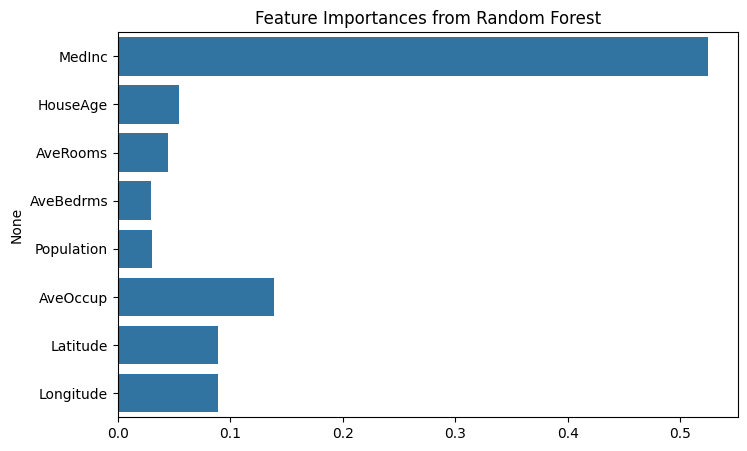

In [13]:
# Get feature importances and names
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances from Random Forest")
plt.show()


### Train the model using top-4 importance feature

In [14]:
# Select indices of top 4 features
top4_idx = np.argsort(importances)[-4:][::-1]
top4_features = feature_names[top4_idx]
print("Top 4 features:", top4_features.tolist())


Top 4 features: ['MedInc', 'AveOccup', 'Latitude', 'Longitude']


In [15]:
# Select those features from dataset
X_top4 = X[top4_features]

# Split train/test for top 4 features
X_train_top4, X_test_top4, y_train_top4, y_test_top4 = train_test_split(X_top4, y, test_size=0.2, random_state=42)

# Retrain Random Forest on top 4 features
rf_top4 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top4.fit(X_train_top4, y_train_top4)

# Evaluate model
y_train_pred = rf_top4.predict(X_train_top4)
y_test_pred = rf_top4.predict(X_test_top4)

print(f"Train R² score (top 4 features): {r2_score(y_train_top4, y_train_pred):.4f}")
print(f"Test R² score (top 4 features): {r2_score(y_test_top4, y_test_pred):.4f}")

Train R² score (top 4 features): 0.9736
Test R² score (top 4 features): 0.8037


In [16]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error (MAE): 0.3231835059108528
Mean Squared Error (MSE): 0.257256428542609
Root Mean Squared Error (RMSE): 0.5072045233853982
